# Notebook Iteracion 5_2 Modelado

### Objetivo:
Ejecutar la subiteracion 5_2 que consiste en la ejecución de los mejores algoritmos sin la zona de San Antionio de Prado y Centro:
- Análisis de correlaciones variable precio vs variables predictoras
- Análisis de correlaciones entre variables predictoras
- Nueva ejecución del modelo línea base
- Bosques Aleatorios (Random Forest)
- Maquinas de Soporte Vectorial (SVR)
- Gradient Boosting
- XGBOOST

In [1]:
# Funciones generales
import sys
sys.path.append('../../')
# A medida que avanzan las iteraciones se crearan mas funcinoes transversales
from funciones import *

# Tuneo de hiperparámetros
from sklearn.model_selection import ParameterGrid

**Lectura de datos**
Lectura de los datos resultantes de la iteración 2

In [2]:
import os 
# get current directory
path = os.getcwd()
# parent directory
path = os.path.abspath('../../')
data_model = pd.read_csv(path + "/iteracion_2/datos_iteracion_2.csv")
data_model.head()

,precio,zona,barrio_sector,baños_familiares,area_bruta,numero_niveles,parqueaderos,alcobas_familiares,estrato,area_total,...,closet_de_linos,biblioteca,parqueadero_visitantes,gimnasio,piscina,salon_social,dispositivos_automatizacion,alarma,tipo_cocina_freq,tipo_pisos_freq
0,1100000.0,centro,castilla,1.0,95.0,1.0,0.0,3.0,0.0,95.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.861534,0.596709
1,950000.0,centro,el salvador,1.0,70.0,1.0,0.0,2.0,3.0,70.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.081652,0.596709
2,970000.0,centro,los angeles,1.0,38.0,1.0,0.0,1.0,4.0,38.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.081652,0.596709
3,1400000.0,centro,prado,1.0,50.0,1.0,1.0,2.0,0.0,50.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.861534,0.596709
4,800000.0,centro,12 de octubre,1.0,92.0,1.0,0.0,3.0,2.0,92.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.861534,0.596709


**Distribución de variable zona**

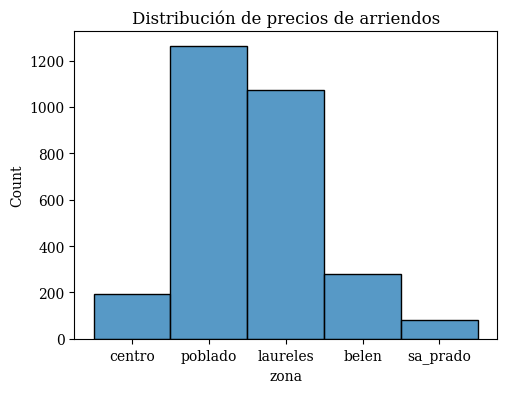

In [3]:
graficar_distribucion_histograma(data_model, 'zona')

Filtro de los datos

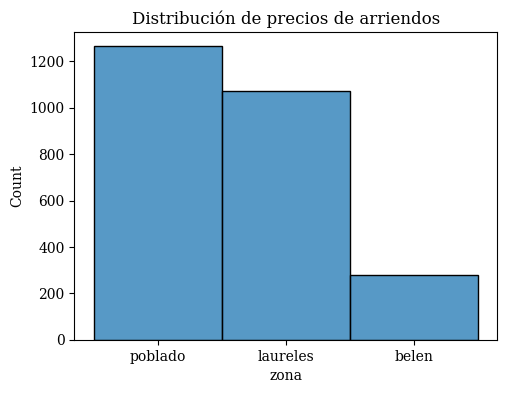

In [4]:
data_model = data_model[data_model["zona"].isin(['poblado', 'laureles', 'belen'])]
graficar_distribucion_histograma(data_model, 'zona')

Dimensiones de la base

In [5]:
imprimir_dimensiones(data_model)

Numero de muestras: 2617, Número de columnas: 39


**Separación de las variables**

Las variables obtenidas por el proceso de scraping se dividen en tres tipos que es importante separar para hacer un análisis mas detallado, estas son:
- Variables categóricas: Variables booleana que indican si un inmueble cuenta con una comodidad
- Variables categoricas numéricas: Variables discretas numéricas
- Variables numéricas: Variables continuas

In [6]:
# Variables preductoras generales
pred_columns = [
    'baños_familiares',
    'area_bruta', 
    'numero_niveles',
    'parqueaderos', 
    'alcobas_familiares', 
    'estrato', 
    'area_total',
    'juegos_infantiles', 
    'balcon', 
    'zona_ropas', 
    'camaras_cctv',
    'cancha_polideportiva', 
    'ascensor', 
    'cancha_squash', 
    'zona_bbq',
    'patio', 
    'unidad_cerrada_conjunto', 
    'zonas_verdes',
    'aire_acondicionado', 
    'jacuzzi', 
    'red_de_Gas', 
    'turco', 
    'porteria_24_7',
    'sauna', 
    'calentador_de_agua', 
    'terraza', 
    'closet_de_linos',
    'biblioteca', 
    'parqueadero_visitantes', 
    'gimnasio', 
    'piscina',
    'salon_social', 
    'dispositivos_automatizacion', 
    'alarma',
    'tipo_cocina_freq', 
    'tipo_pisos_freq'
]

# Variables categóricas
cat_features = ['juegos_infantiles','balcon','zona_ropas','camaras_cctv','cancha_polideportiva',
                'ascensor','cancha_squash','zona_bbq','patio','unidad_cerrada_conjunto',
                'zonas_verdes',
                'aire_acondicionado','jacuzzi','red_de_Gas','turco','porteria_24_7','sauna',
                'calentador_de_agua','terraza','closet_de_linos','biblioteca',
                'parqueadero_visitantes',
                'gimnasio','piscina','salon_social','dispositivos_automatizacion','alarma']

# Variables categíricas numéricas
cat_number_fetures = ['baños_familiares', 'numero_niveles', 'parqueaderos', 'alcobas_familiares', 'estrato']

# Variables numéricas
num_features = ['area_bruta', 'area_total','tipo_cocina_freq','tipo_pisos_freq']

**Distribución de los datos**:

se procede a realizar un análisis de distribución de los datos para observar su comportamiento y posibles tendencias en su influencia sobre el modelo

**Variables numéricas**

Estas variables no recibieron intervención por su distribucion en la iteración 2, por tanto, es importante visualizar si sufren cambios con la eliminación de zonas

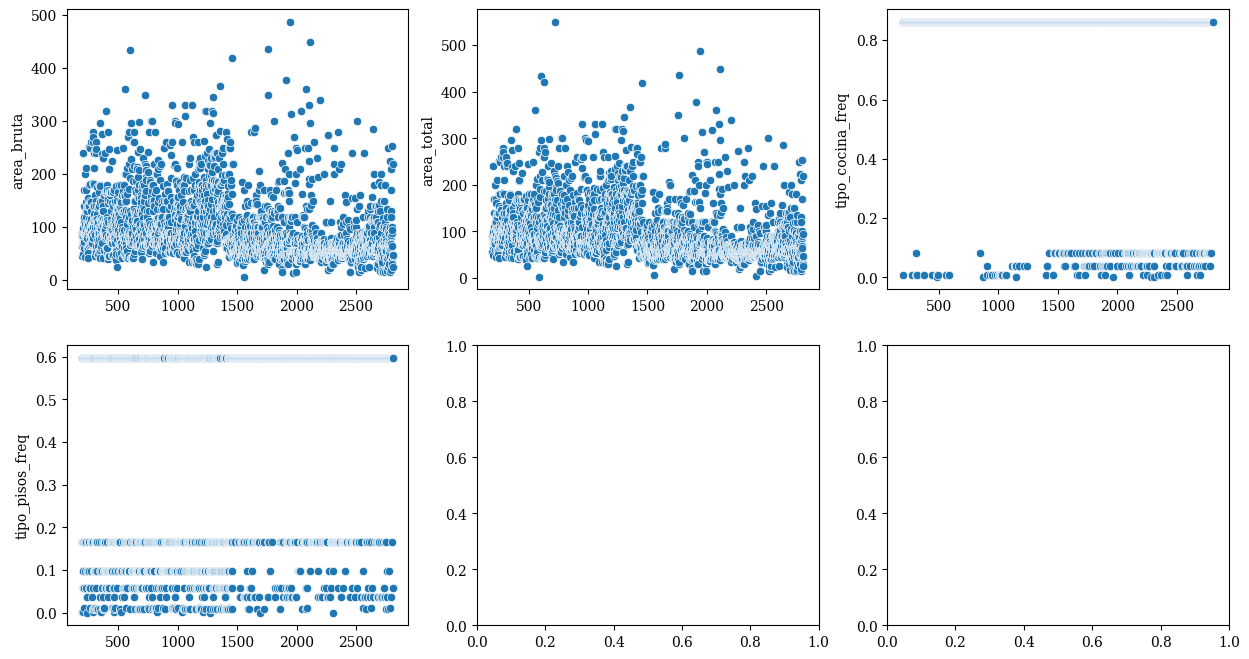

In [7]:
graficar_distribcion_vv(data_model, num_features, "dist")

No se haya comportamientos atípicos para las variables numéricas por tanto no se realiza intervencion a causa de la distribución de estas

**Variables categóricas numéricas**

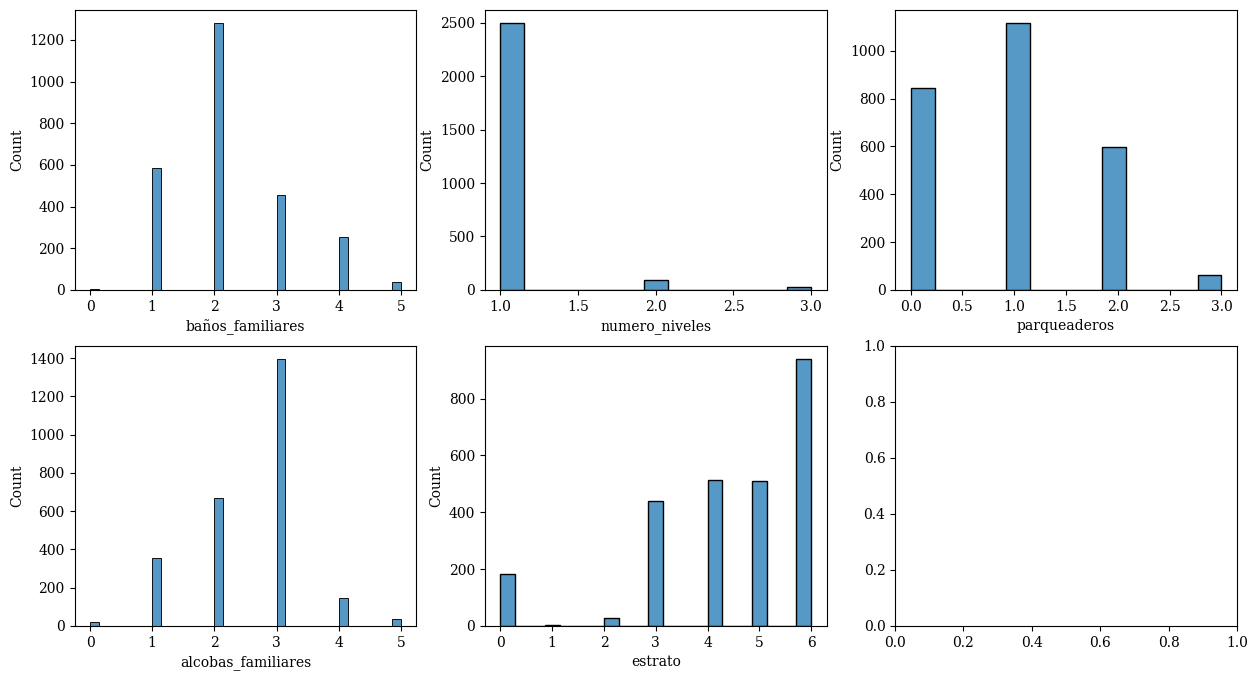

In [8]:
graficar_distribcion_vv(data_model, cat_number_fetures)

No se haya comportamientos atípicos para las variables categóricas numéricas, por tanto, no se realiza intervencion a causa de la distribución de estas. Para aquellas con categorías predominantes el analisis de correlaciones determinará si la variable es influyente para la variable precio

**Variables categóricas numéricas**

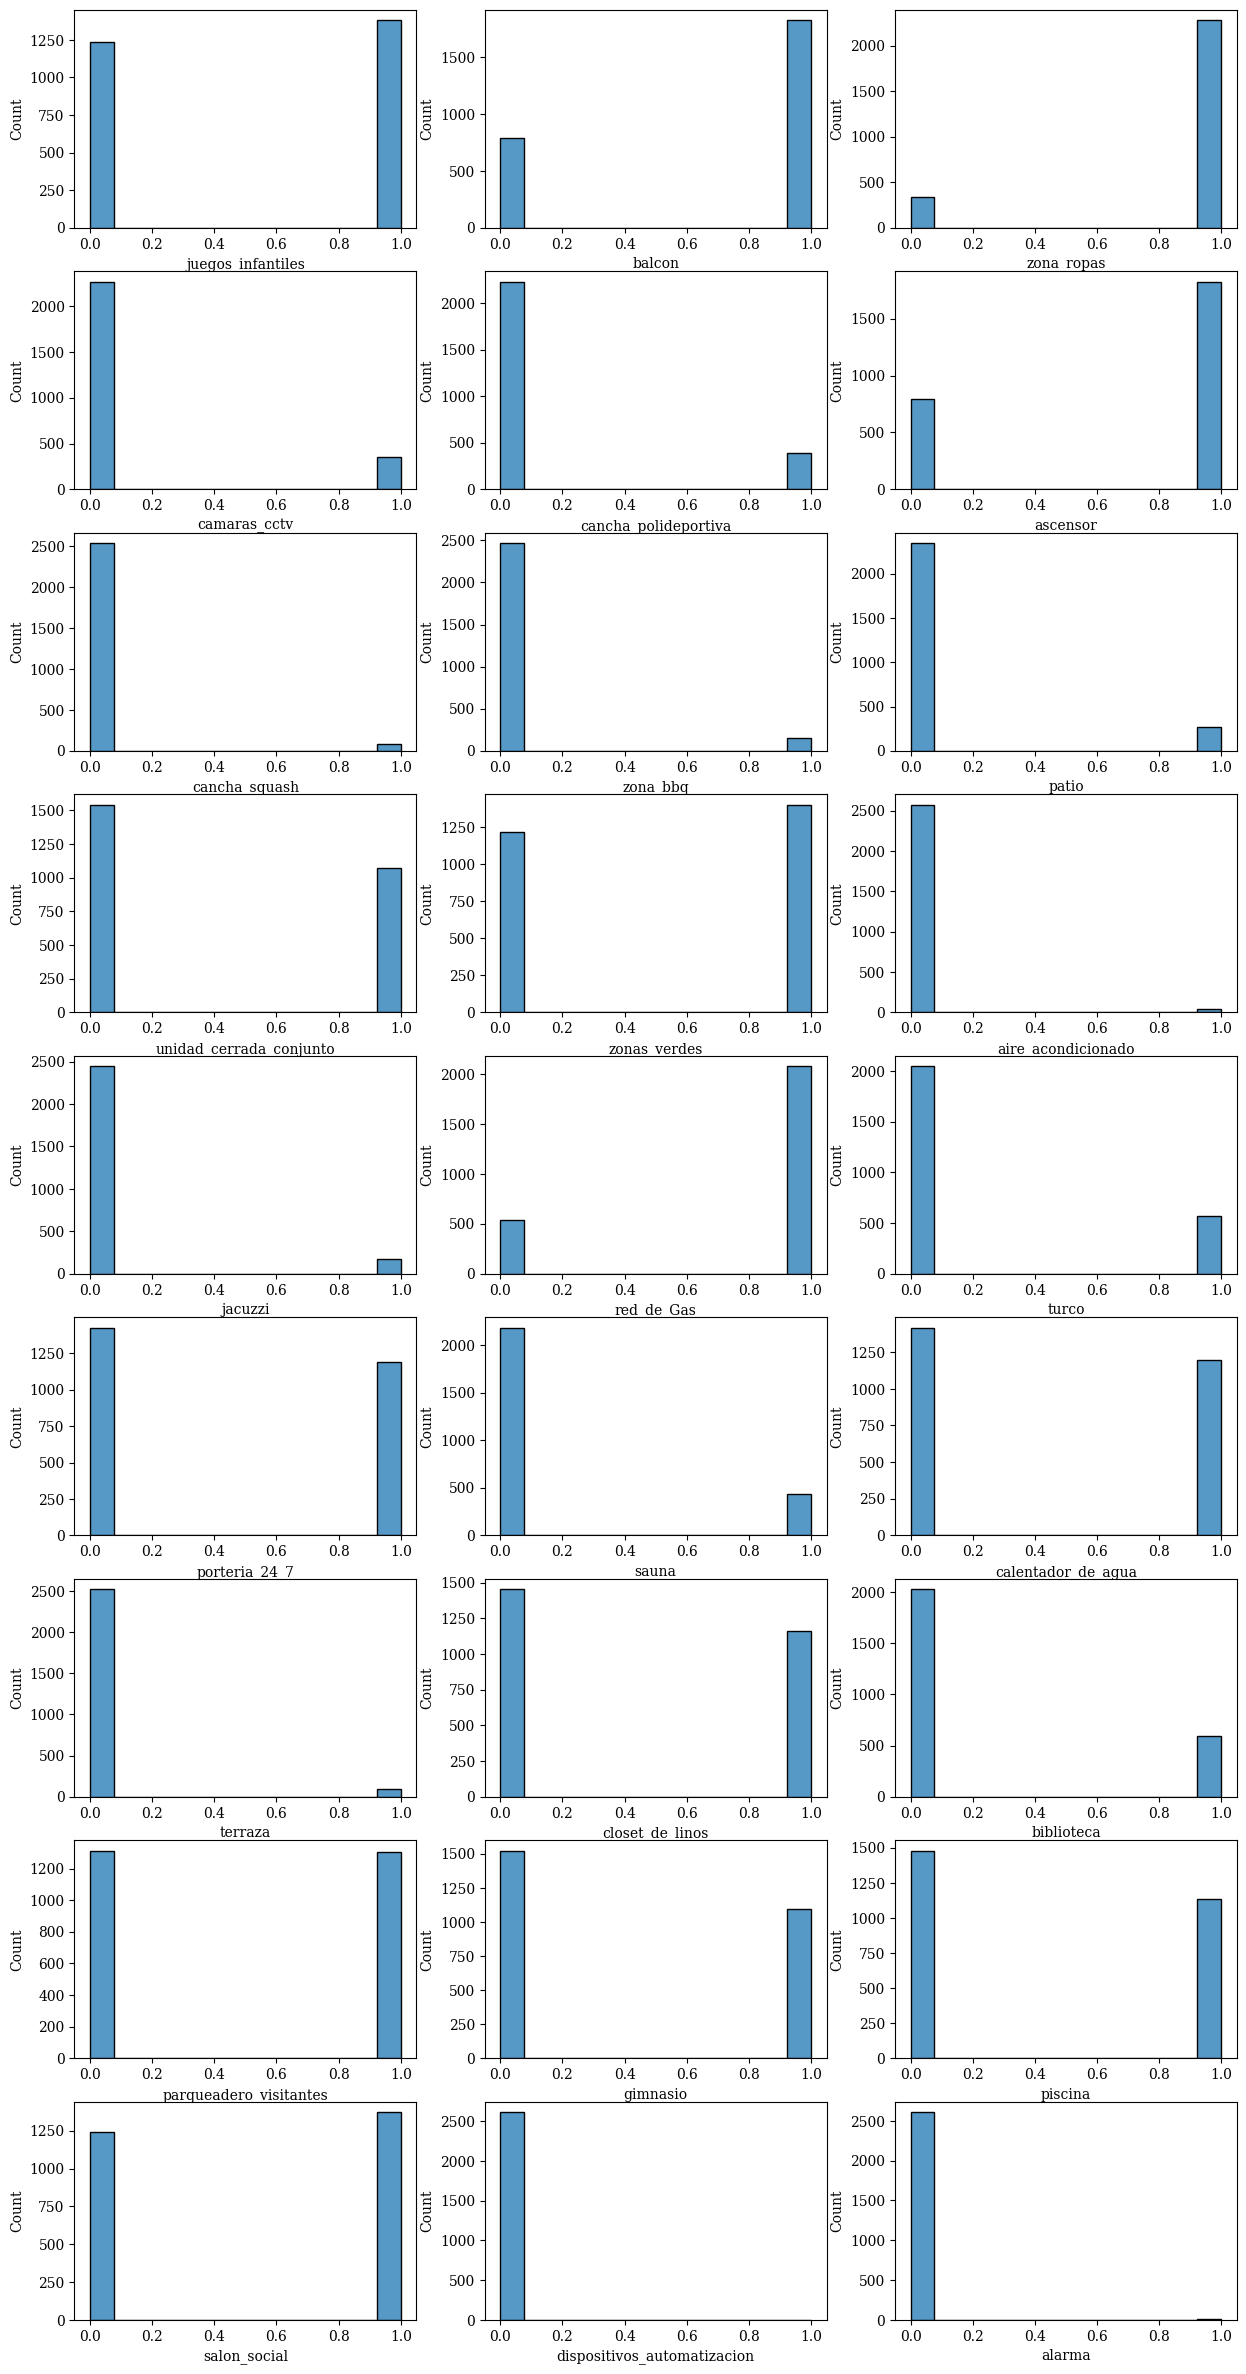

In [9]:
graficar_distribcion_vv(data_model, cat_features, fig_zise=(15,30), num_rows=9)

En las variables categóricas tenemos valores booleanos que representan si una vivienda cuenta con una comodidad o no, aquí es importante resaltar que si la mayoría de las vivientas cuentan con una característica esta variable tomará el valor de 1 en un porcentaje muy superior a 0, lo cual indica que esta no tendra ninguna afectación en el modelo por su falta de variablilidad

Esto se complementa calculando el porcentaje de datos que representa cada categoría

In [10]:
for cat in cat_features:
    print((data_model.groupby(cat).size()/data_model.shape[0])*100)
    print('\n')

juegos_infantiles
0.0    47.229652
1.0    52.770348
dtype: float64


balcon
0.0    30.263661
1.0    69.736339
dtype: float64


zona_ropas
0.0    12.953764
1.0    87.046236
dtype: float64


camaras_cctv
0.0    86.664119
1.0    13.335881
dtype: float64


cancha_polideportiva
0.0    85.250287
1.0    14.749713
dtype: float64


ascensor
0.0    30.263661
1.0    69.736339
dtype: float64


cancha_squash
0.0    96.904853
1.0     3.095147
dtype: float64


zona_bbq
0.0    94.230034
1.0     5.769966
dtype: float64


patio
0.0    89.568208
1.0    10.431792
dtype: float64


unidad_cerrada_conjunto
0.0    58.92243
1.0    41.07757
dtype: float64


zonas_verdes
0.0    46.50363
1.0    53.49637
dtype: float64


aire_acondicionado
0.0    98.318686
1.0     1.681314
dtype: float64


jacuzzi
0.0    93.427589
1.0     6.572411
dtype: float64


red_de_Gas
0.0    20.634314
1.0    79.365686
dtype: float64


turco
0.0    78.181123
1.0    21.818877
dtype: float64


porteria_24_7
0.0    54.489874
1.0    45.510126
dt

Se observa que variables como _cancha_squash_, _zona_bbq_ o _patio_, cuentan con un sesgo muy grande entre categorías, lo cual puede implicar que no sean influyentes en el modelo. Sin embargo, la eliminación de variables con este comportamiento se determinará completando este analisis con correlaciones

**Correlación**

El análisis de correlación se procede mediante las siguientes ejecuciones:
- Método spearman para el cálculo de correlaciones
- Estandarización de las variables predictoras

In [11]:
# Separación de las variables predictoras y la variable respuesta
X = data_model[pred_columns]
Y = data_model['precio']

In [12]:
X_est = estandarizar(X)

**Correlacion variables predictoras vs variable objetivo:**

Se realiza el cálculo de la correlación de spearman de cada una de las variables predictoras vs la variable objetivo, este valor de correlacion se calcula de manera absoluta donde se establece como límite _0.2_ (criterio experto) para determinar si una variable puede ser influyente sobre la variable objetivo _precio_

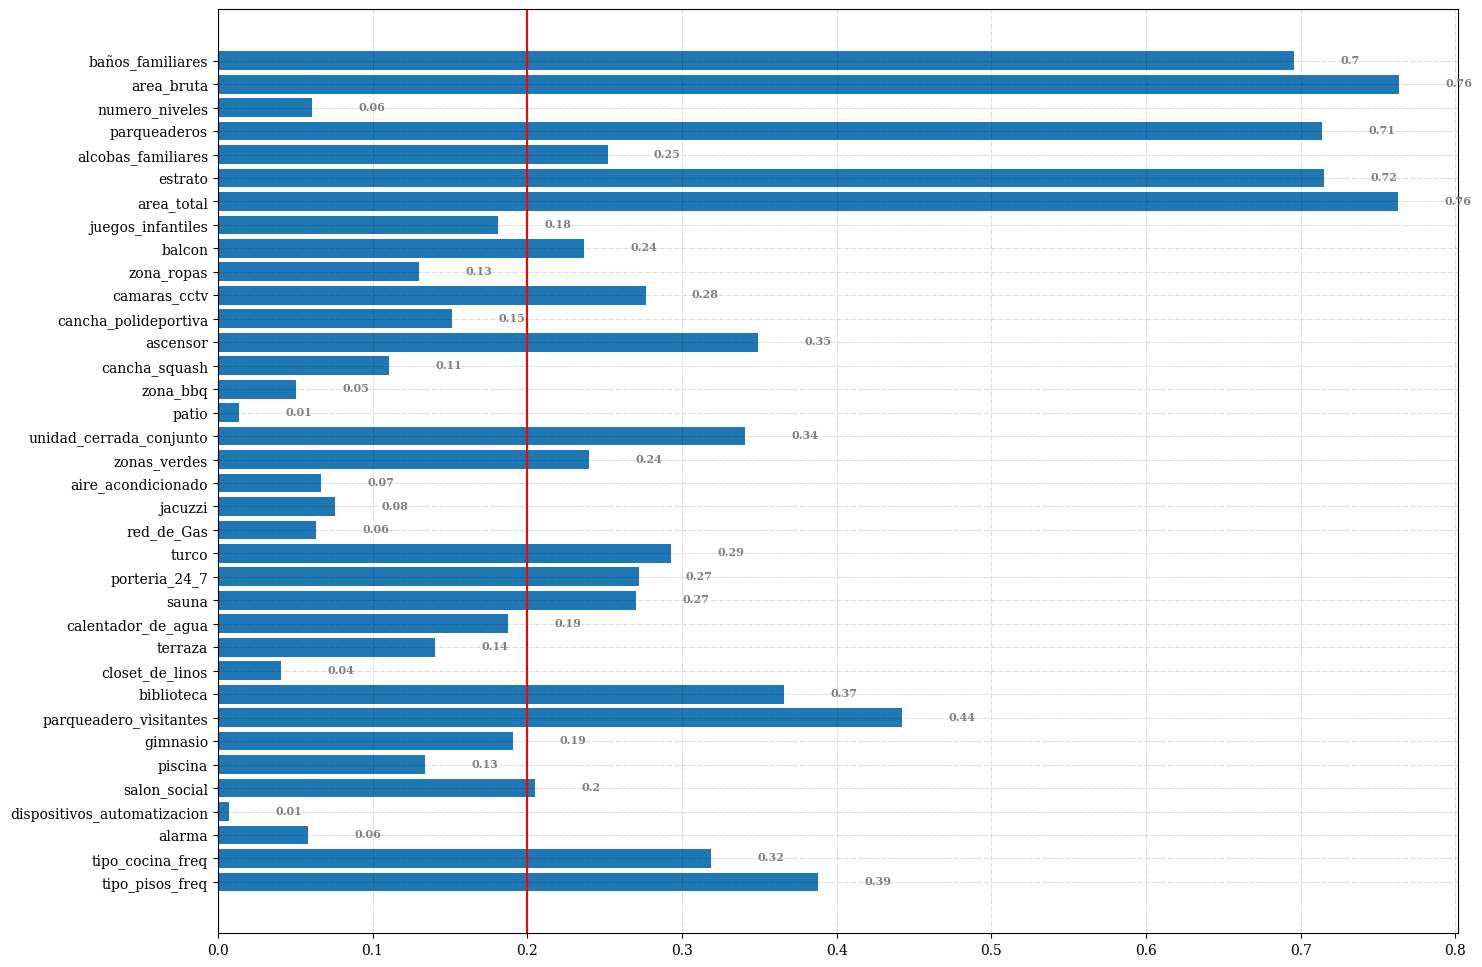

In [13]:
correlacion_vs_objetivo(X_est, Y)

EL gráfico anterior obtenemos que las variables que no influyen, según la correlación con la variable objetivo son:
- numero_niveles
- juegos_infantiles
- zona_ropas
- camaras_cctv
- cancha_polideportiva
- cancha_squash
- zona_bbq
- patio
- aire_acondicionado
- jacuzzi
- red_de_gas
- calentador_de_agua
- terraza
- closet_de_linos
- gimnasio
- piscina
- dispositivos_automatizacion
- alarma

In [32]:
# Variables a descartar por correlación con variable final
columns_disc_corr = [
    "numero_niveles",
    "juegos_infantiles",
    "zona_ropas",
    "camaras_cctv",
    "cancha_polideportiva",
    "cancha_squash",
    "zona_bbq",
    "patio",
    "aire_acondicionado",
    "jacuzzi",
    "red_de_Gas",
    "calentador_de_agua",
    "terraza",
    "closet_de_linos",
    "gimnasio",
    "piscina",
    "dispositivos_automatizacion",
    "alarma",
]

calculando de nuevo la distribución para estas variables obtenemos

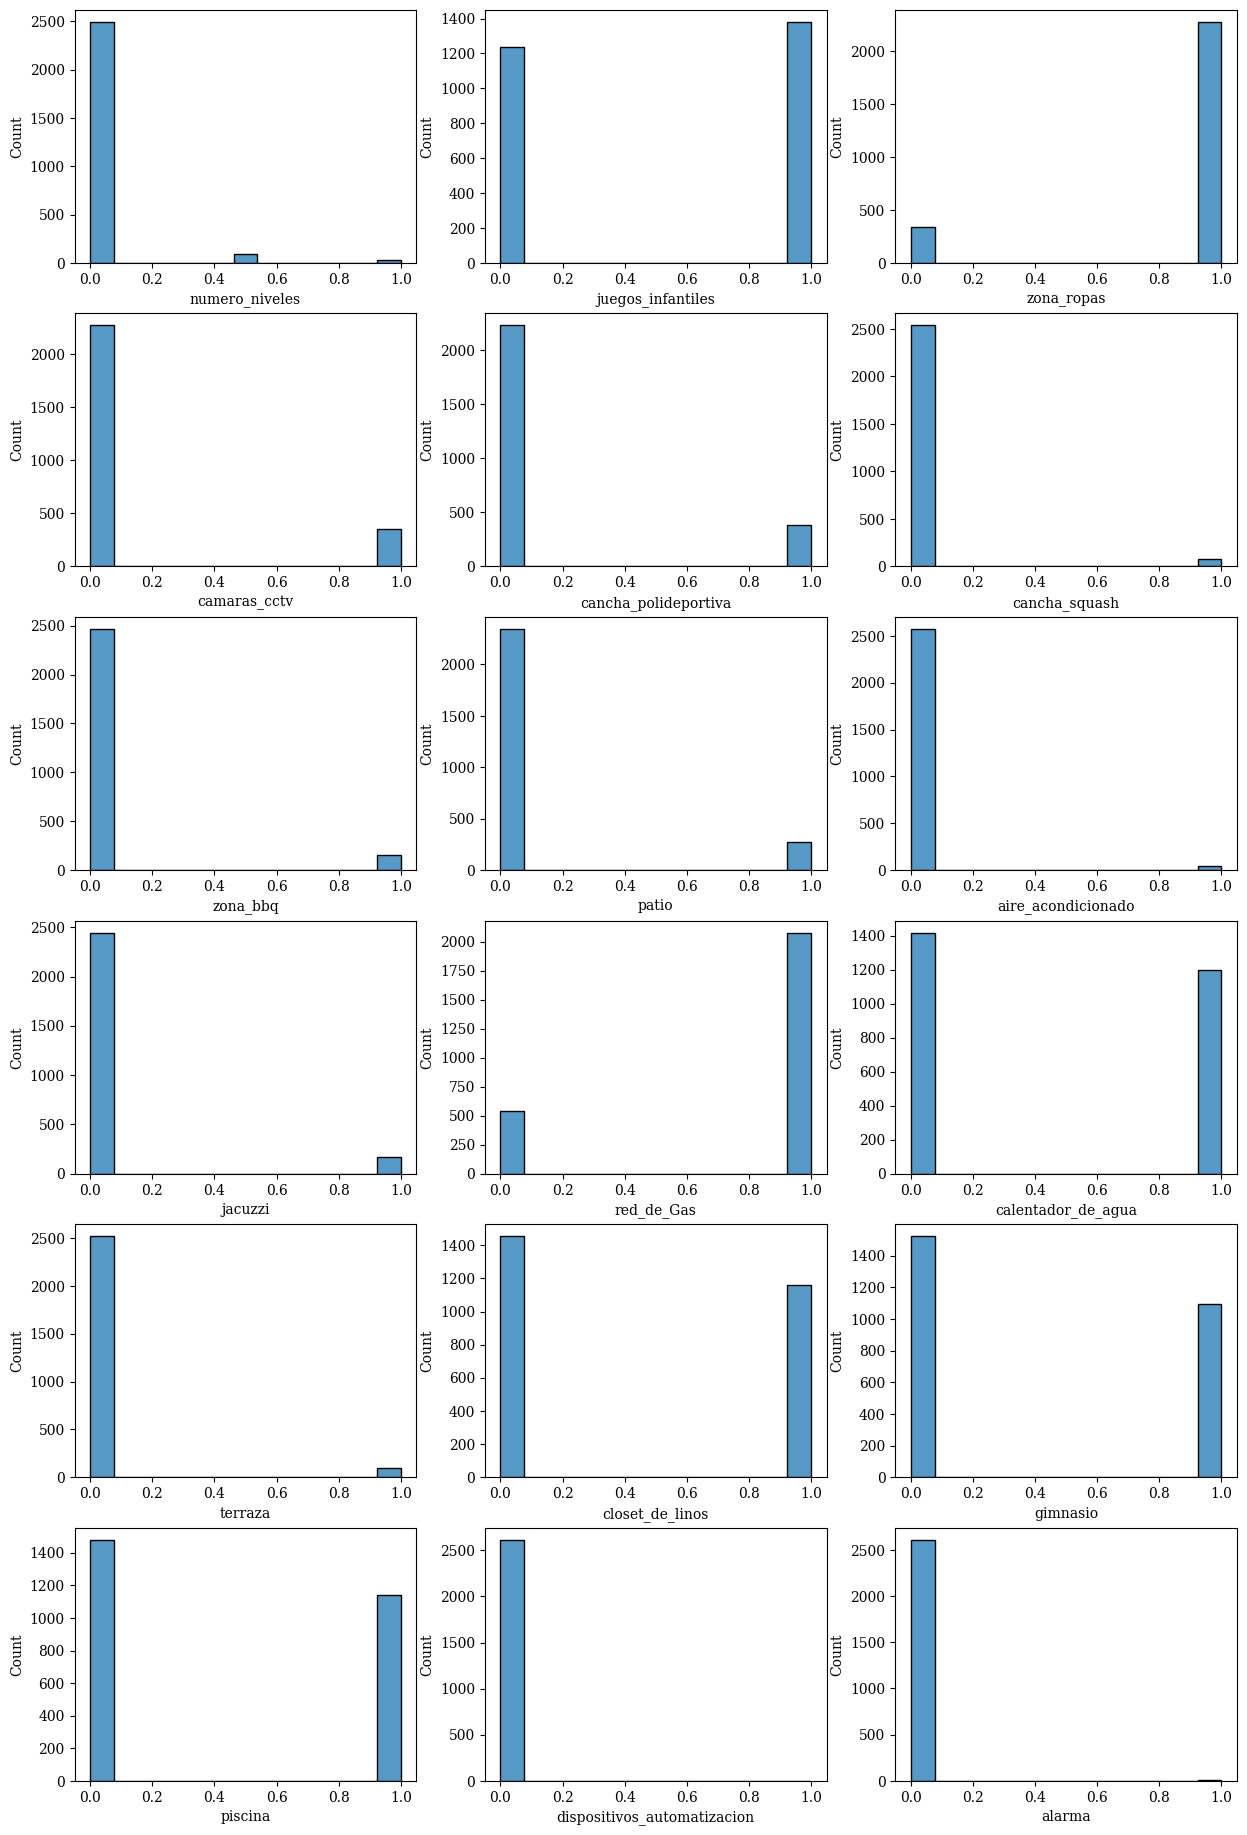

In [33]:
graficar_distribcion_vv(X_est, columns_disc_corr, fig_zise=(15,23) ,num_rows=6, num_cols=3)

Por correlación se obtienen dos nuevas variables (juegos_infantiles, closet_de_linos), sin embargo, no muestran una categoría predominante como las demas, por tanto, con este análisis, correlaciones y criterio del desarrollador las variables a descartar son:

In [16]:
# Variables a descartar por correlación con variable final
columns_disc_corr = [
    "numero_niveles",
    "zona_ropas",
    "camaras_cctv",
    "cancha_polideportiva",
    "cancha_squash",
    "zona_bbq",
    "patio",
    "aire_acondicionado",
    "jacuzzi",
    "red_de_Gas",
    "terraza",
    "dispositivos_automatizacion",
    "alarma",
]

**Correlación entre variables predictoras**

Se procede a calcular el valor de la correlacion entre los tipos de variables, numéricas, categóricas numéricas y categóricas, dando como un valor 0.7 como límite para determinar si dos variables están altamente correlacionadas

**Correlación entre variables numéricas**

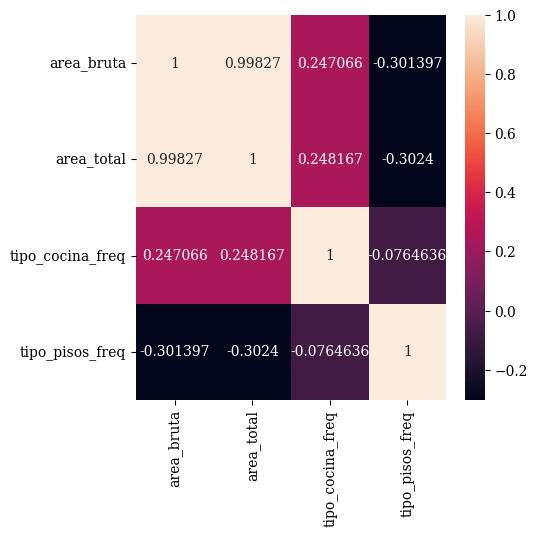

In [17]:
correlacion_tipo_variable(X_est, num_features)

Variables altamente correlacionadas:

- area_total - area_bruta: Variables que presentan un alto valor de correlación. Viendo desde el punto de vista del significado de las variables el área total y el área de una vivienda expresan una similitud muy grande e innecesaria para el modelo, por tanto se elige conservar solo la variable area_bruta

In [18]:
# Adicionar la variable area_bruta a lista de descartables
columns_disc_corr.append("area_total")

**Correlación Numéricas Categóricas**

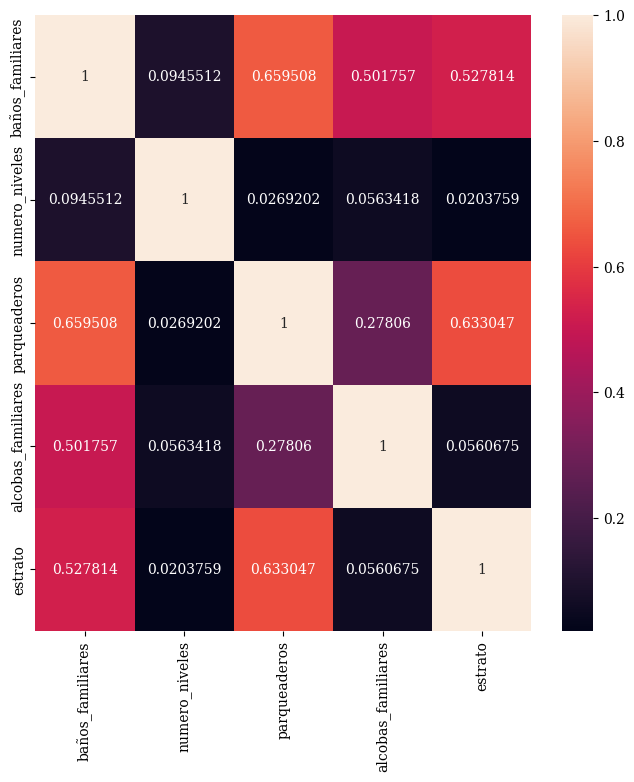

In [19]:
correlacion_tipo_variable(X_est, cat_number_fetures, figsize=(8,8))

Para este tipo de variables no se obtiene un valor que indique una correlación alta

**Correlación Categoricas**

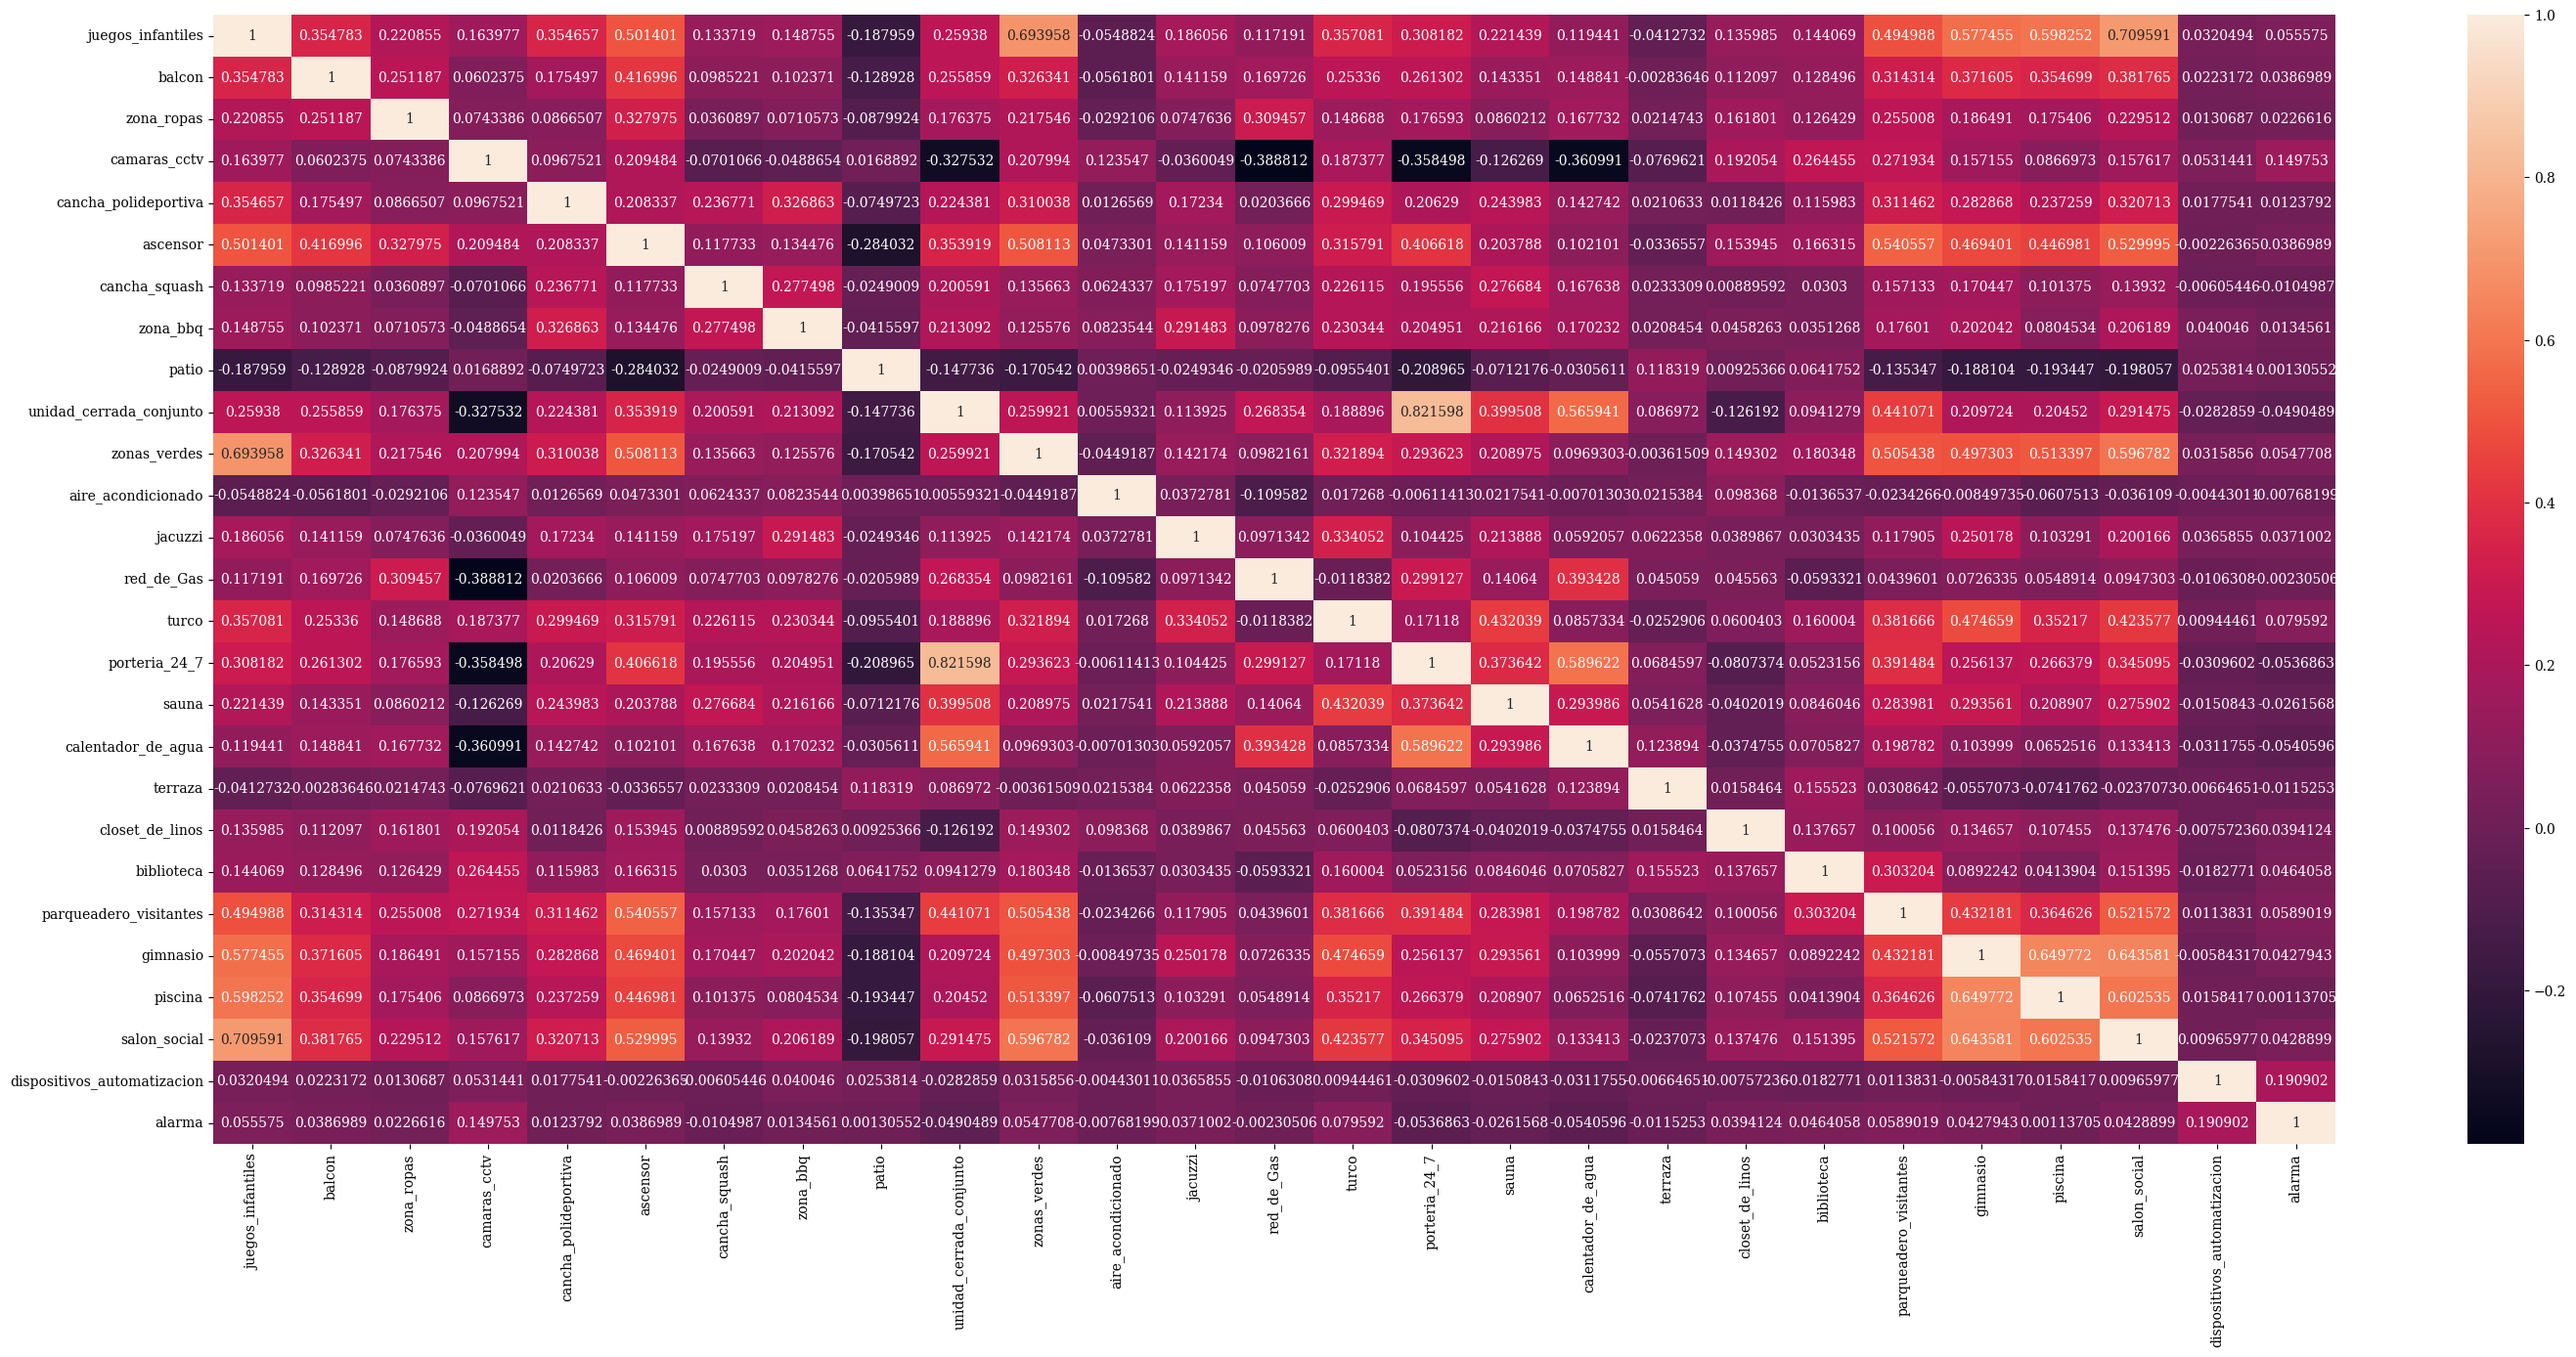

In [20]:
correlacion_tipo_variable(X_est, cat_features, figsize=(35,15))

Para el tipo de variables categóricas se encuentra un alto valor de correlacion entre:
- zonas_verdes - juegos_infantiles
- juegos_infantiles - salon social
- unidad_cerrada_conjunto - porteria_24_7

Para el descarte de una de estas variables se usará el siguiente criterio "La existencia de una variable implica necesariamente la otra?":
- La existencia de zonas verdes no es condición suficiente para la existencia de juegos infantiles, por tanto, se conservan ambas variables
- La existencia de juegos infantiles no es condición suficiente para la existencia de salon social, por tanto, se conservan ambas variables
- Un conjunto de unidad cerrada es, en la mayoria de los casos, implica la existencia de porteria 24/7, por tanto es una variable de la cual se puede prescindir

In [21]:
# Adicionar la variable porteria_24_7 a lista de descartables
columns_disc_corr.append("porteria_24_7")

**Correlación entre todas las variables:**

Para cerrar el análisis por correlaciones se ejecuta un todos vs todos para observar dependencia entre variables de diferente tipo

In [22]:
# Se imprimen solo las correlaciones iguales o superiores a 0.7
correlacion_completa(X_est)

baños_familiares vs area_bruta: 0.7896262579762795
baños_familiares vs area_total: 0.7880316668666897
area_bruta vs baños_familiares: 0.7896262579762795
area_bruta vs area_total: 0.9982701868522642
area_total vs baños_familiares: 0.7880316668666897
area_total vs area_bruta: 0.9982701868522643
juegos_infantiles vs salon_social: 0.7095913377841896
unidad_cerrada_conjunto vs porteria_24_7: 0.8215982678686341
porteria_24_7 vs unidad_cerrada_conjunto: 0.8215982678686342
salon_social vs juegos_infantiles: 0.7095913377841895


De las correlaciones anteriormente analizadas solo hay una nueva, la cual es baños_familiates vs área bruta. Se podría determinar que es lógico que a mayo área existan mas baños, sin embargo, se decide conservar esta correlación y eliminar una de estas cuando se realice un analisis de importancia de variables en una iteración posterior

**Modelo**

La variacion de los hiperparámetros seleccionada corresponde al resultado de multiples ejecuciones observando los resultados obtenidos en los archivos csv que determinaron el aumento, disminución o eliminación de hiperparámetros

Se eliminan las variables de la base de modelado dado los anteriores análisis

In [23]:
x_model = X_est.drop(columns = columns_disc_corr)
y_model = Y.copy()
imprimir_dimensiones(x_model)

Numero de muestras: 2617, Número de columnas: 21


**Dvisión de los datos:** Entrenamiento 75%, Test 25%

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x_model, y_model, test_size = 0.25, train_size = 0.75, random_state = 17)
print("Tamaño de los Datos de Entrenamiento = ", x_train.shape)
print("Tamaño de los Datos de Validación = ", x_test.shape)
print("Tamaño del Vector de Clases de Entrenamiento = ", y_train.shape)
print("Tamaño del Vector de Clases de Prueba = ", y_test.shape)

Tamaño de los Datos de Entrenamiento =  (1962, 21)
Tamaño de los Datos de Validación =  (655, 21)
Tamaño del Vector de Clases de Entrenamiento =  (1962,)
Tamaño del Vector de Clases de Prueba =  (655,)


**Random Forest**

In [25]:
# Grilla de hiperparámetros
param_grid_rf = ParameterGrid(
                {
                 'n_estimators': [40, 60, 80, 100, 150, 200],
                 'min_samples_split' : [2, 3, 5],
                 'min_samples_leaf' : [1,3, 5],
                 'max_features': [10, 12, 14, 16],
                 'max_depth'   : [2, 3, 5, 7]
                }
             )
# Ejecuciones del modelo
ejecutar_modelo(model = "RandomForestRegressor", 
                x_train=x_train, 
                y_train=y_train, 
                x_test=x_test, 
                y_test=y_test, 
                params=param_grid_rf, 
                filename='RandomForestRegressor')

Modelo: {'max_depth': 2, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 40}
Modelo: {'max_depth': 2, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 60}
Modelo: {'max_depth': 2, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 80}
Modelo: {'max_depth': 2, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Modelo: {'max_depth': 2, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Modelo: {'max_depth': 2, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Modelo: {'max_depth': 2, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 40}
Modelo: {'max_depth': 2, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 60}
Modelo: {'max_depth': 2, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estima

**Máquinas de soporte vectorial**

In [26]:
# Grilla de hiperparámetros
param_grid_svm = ParameterGrid(
                {
                 'kernel': ['linear', 'poly'],
                 'C' : [600000, 800000, 900000, 1000000],
                 'degree' : [2, 3, 4, 5],
                })
# Ejecuciones del modelo
ejecutar_modelo(model = "SVR", 
                x_train=x_train, 
                y_train=y_train, 
                x_test=x_test, 
                y_test=y_test, 
                params=param_grid_svm, 
                filename='SVR')

Modelo: {'C': 600000, 'degree': 2, 'kernel': 'linear'}
Modelo: {'C': 600000, 'degree': 2, 'kernel': 'poly'}
Modelo: {'C': 600000, 'degree': 3, 'kernel': 'linear'}
Modelo: {'C': 600000, 'degree': 3, 'kernel': 'poly'}
Modelo: {'C': 600000, 'degree': 4, 'kernel': 'linear'}
Modelo: {'C': 600000, 'degree': 4, 'kernel': 'poly'}
Modelo: {'C': 600000, 'degree': 5, 'kernel': 'linear'}
Modelo: {'C': 600000, 'degree': 5, 'kernel': 'poly'}
Modelo: {'C': 800000, 'degree': 2, 'kernel': 'linear'}
Modelo: {'C': 800000, 'degree': 2, 'kernel': 'poly'}
Modelo: {'C': 800000, 'degree': 3, 'kernel': 'linear'}
Modelo: {'C': 800000, 'degree': 3, 'kernel': 'poly'}
Modelo: {'C': 800000, 'degree': 4, 'kernel': 'linear'}
Modelo: {'C': 800000, 'degree': 4, 'kernel': 'poly'}
Modelo: {'C': 800000, 'degree': 5, 'kernel': 'linear'}
Modelo: {'C': 800000, 'degree': 5, 'kernel': 'poly'}
Modelo: {'C': 900000, 'degree': 2, 'kernel': 'linear'}
Modelo: {'C': 900000, 'degree': 2, 'kernel': 'poly'}
Modelo: {'C': 900000, 'degre

**Gradient Boosting**

In [27]:
param_grid_gb = ParameterGrid({
    'learning_rate' : [.1,.3,.5],
    'max_depth' : [3,5,8],
    'max_features' : ['log2','sqrt'],
    'n_estimators' : [ 45,50, 100, 120],
    'loss': ['squared_error', 'absolute_error', 'huber']
})
# Ejecuciones del modelo
ejecutar_modelo(model = "GradientBoostingRegressor", 
                x_train=x_train, 
                y_train=y_train, 
                x_test=x_test, 
                y_test=y_test, 
                params=param_grid_gb, 
                filename='GradientBoostingRegressor')

Modelo: {'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': 'log2', 'n_estimators': 45}
Modelo: {'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': 'log2', 'n_estimators': 50}
Modelo: {'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': 'log2', 'n_estimators': 100}
Modelo: {'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': 'log2', 'n_estimators': 120}
Modelo: {'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 45}
Modelo: {'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 50}
Modelo: {'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 100}
Modelo: {'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 120}
Modelo: {'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth':

**XGBOOST**

In [28]:
for column in x_train.columns:
    if column not in ['area_bruta', 'tipo_cocina_fre', 'tipo_pisos_freq']:
        x_train[column] = x_train[column].astype('float') 

for column in x_test.columns:
    if column not in ['area_bruta', 'tipo_cocina_fre', 'tipo_pisos_freq']:
        x_test[column] = x_test[column].astype('float') 

In [29]:
param_grid_xgb = ParameterGrid({
    'n_estimators' : [40, 80, 100],
    'max_depth' : [3,5],
    'learning_rate' : [.03, .05],
    'objective' : ['reg:squarederror'],
    'subsample' : [0.3, 0.5, 0.8],
    'eta' : [.01, .05, .1],
})
# Ejecuciones del modelo
ejecutar_modelo(model = "XGBRegressor", 
                x_train=x_train, 
                y_train=y_train, 
                x_test=x_test, 
                y_test=y_test, 
                params=param_grid_xgb, 
                filename='XGBRegressor')

Modelo: {'eta': 0.01, 'learning_rate': 0.03, 'max_depth': 3, 'n_estimators': 40, 'objective': 'reg:squarederror', 'subsample': 0.3}
Modelo: {'eta': 0.01, 'learning_rate': 0.03, 'max_depth': 3, 'n_estimators': 40, 'objective': 'reg:squarederror', 'subsample': 0.5}
Modelo: {'eta': 0.01, 'learning_rate': 0.03, 'max_depth': 3, 'n_estimators': 40, 'objective': 'reg:squarederror', 'subsample': 0.8}
Modelo: {'eta': 0.01, 'learning_rate': 0.03, 'max_depth': 3, 'n_estimators': 80, 'objective': 'reg:squarederror', 'subsample': 0.3}
Modelo: {'eta': 0.01, 'learning_rate': 0.03, 'max_depth': 3, 'n_estimators': 80, 'objective': 'reg:squarederror', 'subsample': 0.5}
Modelo: {'eta': 0.01, 'learning_rate': 0.03, 'max_depth': 3, 'n_estimators': 80, 'objective': 'reg:squarederror', 'subsample': 0.8}
Modelo: {'eta': 0.01, 'learning_rate': 0.03, 'max_depth': 3, 'n_estimators': 100, 'objective': 'reg:squarederror', 'subsample': 0.3}
Modelo: {'eta': 0.01, 'learning_rate': 0.03, 'max_depth': 3, 'n_estimators'

**Consolidación de mejores resultados:**

Dada las ejecuciones de los modelos con la variación de sus hiperparámetros, considerando la alteración de la base, se consolida los mejores resultados obtenidos de cada algoritmo. Cabe resaltar que algunas combinaciones de parámetros tienen los mismos resultados en métricas.

**Random Forest**

| R2_train | R2_test | RMSE_train | RMSE_test | MAPE_train | MAPE_test | max_depth | max_features | min_samples_leaf | min_samples_split | n_estimators |
| --- | --- |  --- |  --- |  --- |  --- |  --- | --- |  --- | --- | --- |
| 0.78 | 0.73 | 962915.73 | 1085599.87 | 0.22 | 0.25 | 5 | 16 | 5 | 5 | 40 |

**SVR**

| R2_train | R2_test | RMSE_train | RMSE_test | MAPE_train | MAPE_test | C | Degree | Kernel |
| --- | --- |  --- |  --- |  --- |  --- |  --- | --- | --- | 
| 0.74 | 0.71 | 1043737.84 | 1124187.99 | 0.2 | 0.24 | 1000000 | 2 | poly |

**Gradient boosting**

| R2_train | R2_test | RMSE_train | RMSE_test | MAPE_train | MAPE_test | Learning rate | Loss | Max depth | Max features | N estimators |
| --- | --- |  --- |  --- |  --- |  --- |  --- | --- | --- |  --- |  --- | 
| 0.77 | 0.73 | 982184.71 | 1087837.28 | 0.19 | 0.21 | 0.1  | absolute_error | 3 | sqrt | 120 |

**XGBoost**

| R2_train | R2_test | RMSE_train | RMSE_test | MAPE_train | MAPE_test | Eta | Learning rate | Max depth | N estimators | Objetive | Subsample |
| --- | --- |  --- |  --- |  --- |  --- |  --- | --- | --- |  --- |  --- | --- |
| 0.73 | 0.69 | 1055116.34 | 1169434.38 | 0.18 | 0.19 | 0.01  | 0.05 | 5 | 40 | reg:squarederror | 0.5 |

**Conclusiones**

- El tratamiento de datos realizado no muestra cambios que lleve a tomar nuevas decisiones sobre la base de entrenamiento, sin embargo, sí se obtuvo la presencia de nuevas variables que según la correlación no afectan la variable precio.
- Los algoritmos de __xgboost__ y __gradient boosting__ conservan buenos resultados aun bajo la eliminación de datos, esto marca un indicio de cuál puede ser el mejor modelo para el proyecto.
- En busca de las métricas del negocio de procederá con la siguiente sub iteracion, sin embargo, si en ella aún no se obtiene las métricas buscadas se ejecutará una estrategia diferente de analisis por zonas